In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor


Question (b)

Number of rows: 9568
Number of columns: 5
Column Names: ['AT', 'V', 'AP', 'RH', 'PE']


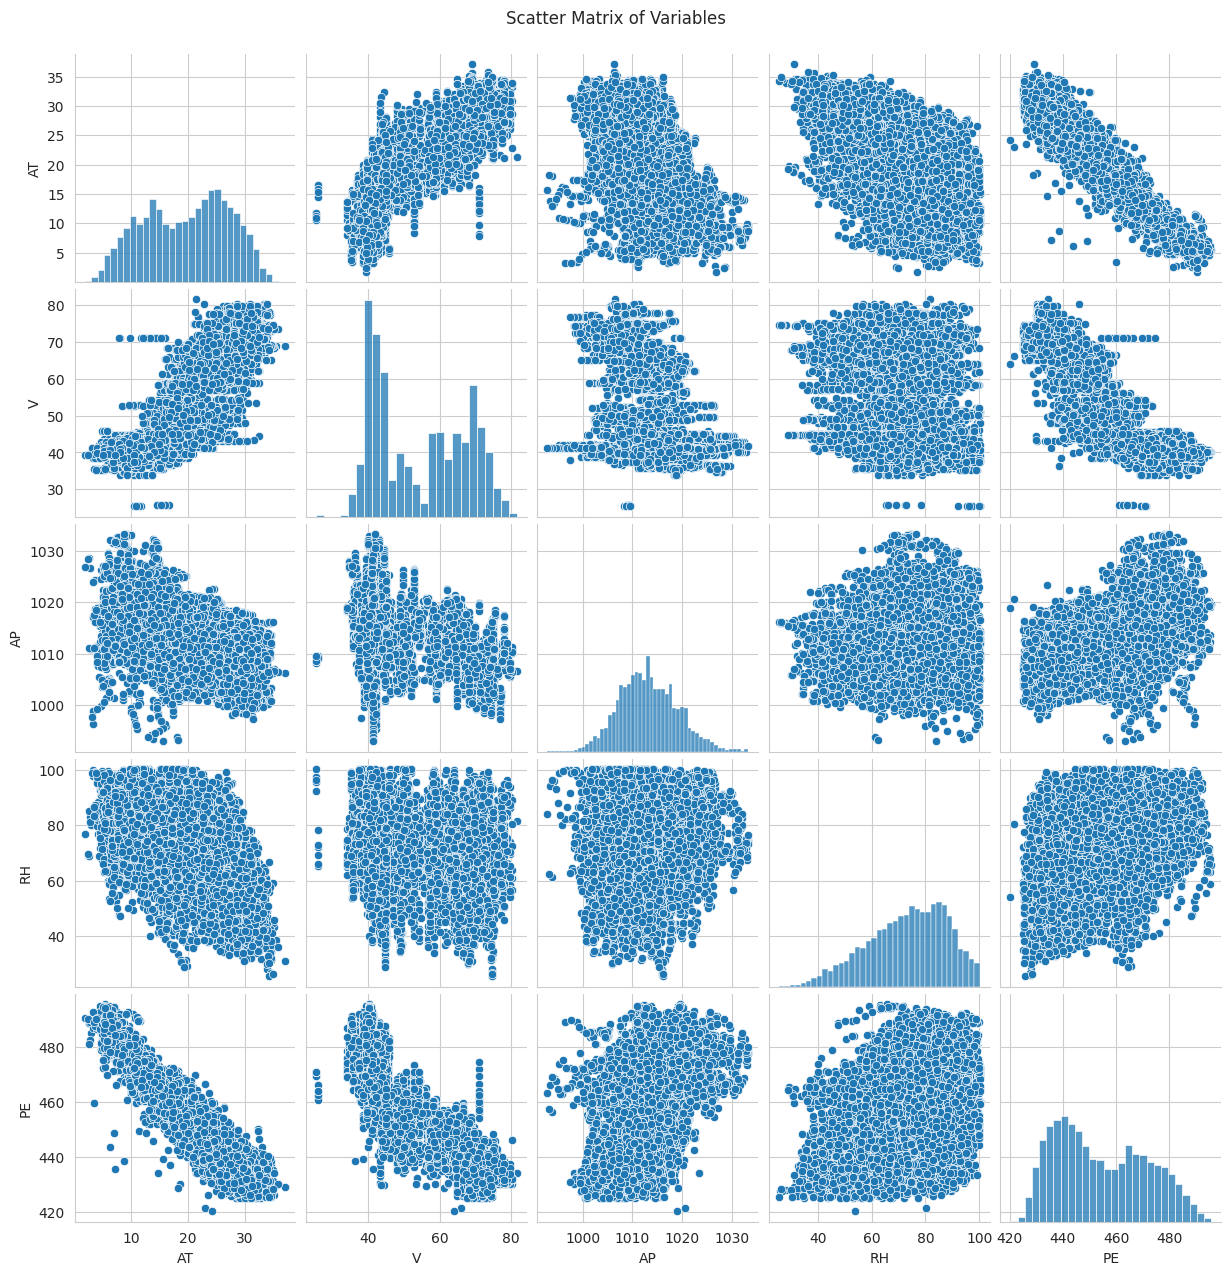

           mean    median  range         Q1       Q3      IQR
AT    19.651231    20.345  35.30    13.5100    25.72  12.2100
V     54.305804    52.080  56.20    41.7400    66.54  24.8000
AP  1013.259078  1012.940  40.41  1009.1000  1017.26   8.1600
RH    73.308978    74.975  74.60    63.3275    84.83  21.5025
PE   454.365009   451.550  75.50   439.7500   468.43  28.6800


In [43]:
#/content/sample_data/Folds5x2_pp.xlsx(colab)
file_path = "Folds5x2_pp.xlsx"
df = pd.read_excel(file_path)

num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print("Column Names:", df.columns.tolist())
sns.pairplot(df)
plt.suptitle("Scatter Matrix of Variables", y=1.02)
plt.show()

summary_stats = df.describe().T
summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats["IQR"] = summary_stats["75%"] - summary_stats["25%"]
summary_stats = summary_stats[["mean", "50%", "range", "25%", "75%", "IQR"]]
summary_stats.rename(columns={"50%": "median", "25%": "Q1", "75%": "Q3"}, inplace=True)
print(summary_stats)


Question (c):Based on the plots,predictor 'AT' has highest R square and large coefificient.Also it's statistically significant.

AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        06:25:31   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      

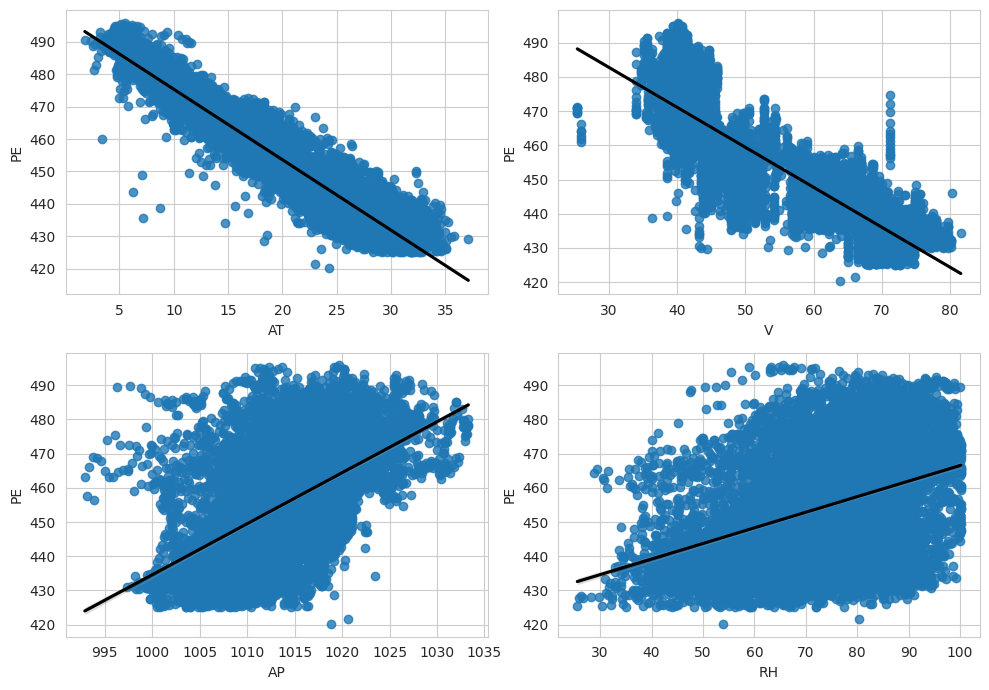

In [44]:
res_var = df['PE']
predictors = ['AT', 'V', 'AP', 'RH']
regression_results = {}

for predictor in predictors:
    X_simple = sm.add_constant(df[predictor])
    model_simple = sm.OLS(res_var, X_simple).fit()
    regression_results[predictor] = model_simple.summary()
for predictor, summary in regression_results.items():
    print(f"{predictor}")
    print(summary, "\n")
# P;ot
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
for i, predictor in enumerate(predictors):
    row, col = divmod(i, 2)
    sns.regplot(x=df[predictor], y=res_var, ax=axes[row, col],line_kws={"color": "black"})
plt.tight_layout()
plt.show()


Question (d):Since the p-value of AT,AP,RH,V are all less than 0.0001,it means that they are all statistically significant.So we can reject the null hypotheis for predictors AT,AP,RH,V.

In [45]:
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        06:25:34   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

Question (e)

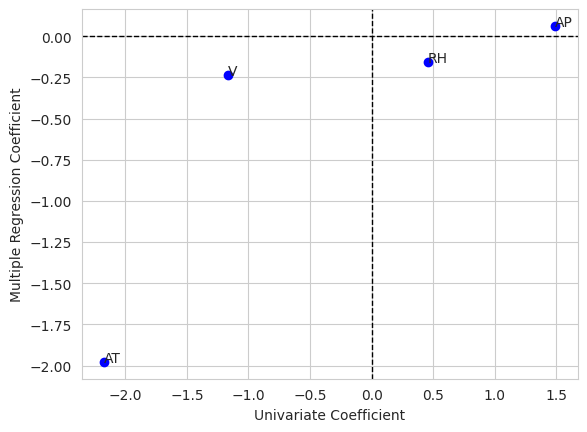

In [63]:
simple_coef = [-2.1713, -1.1681, 1.4899, 0.4557]
multiple_coef = [-1.9775, -0.2339, 0.0621, -0.1581]
predictors = ['AT', 'V', 'AP', 'RH']

plt.scatter(simple_coef, multiple_coef, color='blue')
for i, predictor in enumerate(predictors):
    plt.text(simple_coef[i], multiple_coef[i], predictor)

# Plot
plt.xlabel("Univariate Coefficient")
plt.ylabel("Multiple Regression Coefficient")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()


Question (f)

In [48]:
poly_results = {}

for predictor in ['AT', 'V', 'AP', 'RH']:
    X_poly = np.column_stack((df[predictor], df[predictor]**2, df[predictor]**3))
    X_poly = sm.add_constant(X_poly)

    model_poly = sm.OLS(df['PE'], X_poly).fit()  l
    poly_results[predictor] = model_poly.summary()

for predictor, summary in poly_results.items():
    print(f"{predictor}:\n")
    print(summary, "\n")


AT:

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        06:26:16   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248    

Question (g)

In [50]:
predictors = ['AT', 'V', 'AP', 'RH']
X = df[predictors].copy()
for var1, var2 in combinations(predictors, 2):
    X[f"{var1}*{var2}"] = df[var1] * df[var2]
X = sm.add_constant(X)
model_interaction = sm.OLS(df['PE'], X).fit()

print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        06:29:35   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

Question (h)

In [79]:

X = df[['AT', 'V', 'AP', 'RH']].copy()
y = df['PE']
for var1, var2 in combinations(X.columns, 2):
    X[f"{var1}*{var2}"] = df[var1] * df[var2]
for var in X.columns[:4]:
    X[f"{var}^2"] = df[var]**2

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model_reg = LinearRegression().fit(X_train, y_train)

# Compute the MSE
mse_reg_train = mean_squared_error(y_train, model_reg.predict(X_train))
mse_reg_test = mean_squared_error(y_test, model_reg.predict(X_test))

# Select significant features based on p-values
model_ols = sm.OLS(y_train, sm.add_constant(X_train)).fit()
significant_vars = model_ols.pvalues[1:][model_ols.pvalues[1:] < 0.05].index  # Ignore intercept

# Train modified model
X_train_modified, X_test_modified = X_train[significant_vars], X_test[significant_vars]
model_modified = LinearRegression().fit(X_train_modified, y_train)

# Compute the MSE
mse_reduced_train = mean_squared_error(y_train, model_modified.predict(X_train_modified))
mse_reduced_test = mean_squared_error(y_test, model_modified.predict(X_test_modified))

# Print the results
print(f"Regession Model: Train MSE: {mse_reg_train:.2f}, Test MSE: {mse_reg_test:.2f}")
print(f"Modified Model: Train MSE: {mse_reduced_train:.2f}, Test MSE: {mse_reduced_test:.2f}")


Regession Model: Train MSE: 17.89, Test MSE: 18.65
Modified Model: Train MSE: 18.46, Test MSE: 19.22


Question (i)

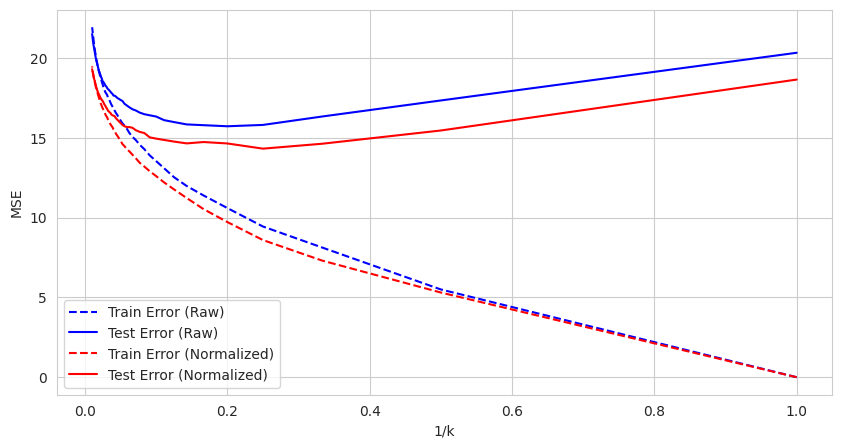

In [80]:
X = df[['AT', 'V', 'AP', 'RH']].copy()
y = df['PE']
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_norm, X_test_norm, _, _ = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
k_values = range(1, 101)
train_errors_raw, test_errors_raw = [], []
train_errors_norm, test_errors_norm = [], []

# Train the KNN regression models
for k in k_values:
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, y_train)
    train_errors_raw.append(mean_squared_error(y_train, knn_raw.predict(X_train)))
    test_errors_raw.append(mean_squared_error(y_test, knn_raw.predict(X_test)))


    knn_norm = KNeighborsRegressor(n_neighbors=k)
    knn_norm.fit(X_train_norm, y_train)
    train_errors_norm.append(mean_squared_error(y_train, knn_norm.predict(X_train_norm)))
    test_errors_norm.append(mean_squared_error(y_test, knn_norm.predict(X_test_norm)))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(1/np.array(k_values), train_errors_raw, '--b', label="Train Error (Raw)")
plt.plot(1/np.array(k_values), test_errors_raw, 'b', label="Test Error (Raw)")
plt.plot(1/np.array(k_values), train_errors_norm, '--r', label="Train Error (Normalized)")
plt.plot(1/np.array(k_values), test_errors_norm, 'r', label="Test Error (Normalized)")
plt.xlabel("1/k")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()


Question (j):Based on the comparsion above,the KNN with Normalized feature performed the best.It has lowest test MSE and variance of residuals.Also both KNN models are better than linear regression model.

In [75]:
best_k_raw = k_values[np.argmin(test_errors_raw)]
best_k_norm = k_values[np.argmin(test_errors_norm)]

knn_best_raw = KNeighborsRegressor(n_neighbors=best_k_raw).fit(X_train, y_train)
knn_best_norm = KNeighborsRegressor(n_neighbors=best_k_norm).fit(X_train_norm, y_train)

y_test_pred_knn_raw = knn_best_raw.predict(X_test)
y_test_pred_knn_norm = knn_best_norm.predict(X_test_norm)


mse_knn_raw = mean_squared_error(y_test, y_test_pred_knn_raw)
mse_knn_norm = mean_squared_error(y_test, y_test_pred_knn_norm)


residuals_linear = y_test - model_modified.predict(X_test_modified)
residuals_knn_raw = y_test - y_test_pred_knn_raw
residuals_knn_norm = y_test - y_test_pred_knn_norm

mse_linear = min(mse_reg_test, mse_reduced_test)


comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", f"KNN (Raw)", f"KNN (Normalized)"],
    "Test MSE": [mse_linear, mse_knn_raw, mse_knn_norm],
    "Mean Residual": [np.mean(residuals_linear), np.mean(residuals_knn_raw), np.mean(residuals_knn_norm)],
    "Variance of Residuals": [np.var(residuals_linear), np.var(residuals_knn_raw), np.var(residuals_knn_norm)]
})

from IPython.display import display
display(comparison_df)



,Model,Test MSE,Mean Residual,Variance of Residuals
0,Linear Regression,18.647312,-0.000100,19.221019
1,KNN (Raw),15.726820,-0.016730,15.726540
2,KNN (Normalized),14.323657,0.066793,14.319196
